# ML Title: Predicting Bicycle Imbalances in a bike-sharing System

This notebook covers the exploration of the data identified and collected to be used to model a predictive model that can predict imbalances in a bike sharing system.

The analysis shows investigations and plots conducted with intuition and includes the following

1. Heat maps
2. Correlation Matrices
3. Boxplots
4. Feature Independence Plots
5. Outlier Plots
6. Illustration of Patterns of Interest
7. Illustration of Trends in Time and Space

#### GROUP MEMBERS
1. SIMON ONEN - 2022/HD05/1443U
2. SAMUEL MUGABI - 2022/HD05/1452U

#### Our Approach
> Approach will use a minimun of 10 ML models
1. Problem Identification
2. Avaibale Data
3. How Evaluation is done
4. The features avalibale
5. Modelling
6. Experimenting

#### 1. Problem Identified
> From the identified features in the dataset, can we predict whether or not there will be an imbalance in any given bike docking station or not through the number of bike distribution at each station?

#### 2. Data

The original data was initially from [Blue Bikes](https://www.bluebikes.com/system-data) system data. Another version is also available on [Kaggle](https://www.kaggle.com/datasets/jackdaoud/bluebikes-in-boston?resource=download).

#### 3. Evaluation
> For this model to be considered accurate a score of 97% will be considered.


#### 4. Features
> Details about each feature in the dataset

**Data Features/Columns**
   - ```tripduration```: duration of trip in seconds
   - ```starttime```: start time and date of trip
   - ```stoptime```: stop time and date of trip
   - ```start station id```: unique ID of station the trip started at
   - ```start station name```: name of station the trip started at
   - ```start station latitude```: latitude of start station of trip
   - ```start station longitude```: longitude of start station of trip
   - ```end station id```: unique ID of station the trip started at
   - ```end station name```: name of station the trip ended at
   - ```end station latitude```: latitude of end station of trip
   - ```end station longitude```: longitude of end station of trip
   - ```bikeid```: unique ID of bike used for trip
   - ```usertype```: type of user can be Customer or Subscriber
   - ```birth year```: birth year of user
   - ```gender```: gender of user

### EDA-TOOLS

#### The Tools to be used
> importing the necessary libraries - pandas, numpy, matplotlib, sikit-learn models for training and evaluation

In [1]:
# imports
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

# set up pandas to display all rows and columns
pd.set_option('display.max_rows', 5000000)
pd.set_option('display.max_columns', 20)

# Set the seaborn style formating
sns.color_palette("tab10")
plt.style.use('seaborn-colorblind')

### EDA-Data Processing

#### Load the datasets and merge

###### import the datasets

In [2]:
df_1 = pd.read_csv('datasets/2019/201901-bluebikes-tripdata.csv')
df_2 = pd.read_csv('datasets/2019/201902-bluebikes-tripdata.csv')
df_3 = pd.read_csv('datasets/2019/201903-bluebikes-tripdata.csv')
df_4 = pd.read_csv('datasets/2019/201904-bluebikes-tripdata.csv')
df_5 = pd.read_csv('datasets/2019/201905-bluebikes-tripdata.csv')
df_6 = pd.read_csv('datasets/2019/201906-bluebikes-tripdata.csv')
df_7 = pd.read_csv('datasets/2019/201907-bluebikes-tripdata.csv')
df_8 = pd.read_csv('datasets/2019/201908-bluebikes-tripdata.csv')
df_9 = pd.read_csv('datasets/2019/201909-bluebikes-tripdata.csv')
df_10 = pd.read_csv('datasets/2019/201910-bluebikes-tripdata.csv')
df_11 = pd.read_csv('datasets/2019/201911-bluebikes-tripdata.csv')
df_12 = pd.read_csv('datasets/2019/201912-bluebikes-tripdata.csv')

##### Merge the datasets

In [3]:
bike_data = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12])
bike_data.shape

(2522771, 15)

##### Preview

In [4]:
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2


In [5]:
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 308.0+ MB


### EDA-Data Cleaning

#### Create a back-up of the original dataset 

In [7]:
bike_data.to_csv('bike_data_2019.csv', index=False)

#### Categories

In [8]:
# change usertype to a categorical dtype from an object dtype

bike_data['usertype']= bike_data.usertype.astype('category')

In [9]:
# change the 'starttime' and 'ended_at' dtype to datetime

bike_data['starttime']= pd.to_datetime(bike_data.starttime)
bike_data['stoptime']= pd.to_datetime(bike_data.stoptime)

#### Missing Values

In [10]:
# find missing values

df_null = bike_data.isnull().sum().rename_axis('features').reset_index()
df_null

,features,0
0,tripduration,0
1,starttime,0
2,stoptime,0
3,start station id,0
4,start station name,0
5,start station latitude,0
6,start station longitude,0
7,end station id,0
8,end station name,0
9,end station latitude,0


In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         int64         
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           int64         
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 category      
 13  birth year               int64         
 14  gender                   int64         
dtypes: category(1), datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 291.1+ MB


#### Duplicates

In [12]:
# checking for any duplicated values

bike_data.duplicated().any()

False

#### Renaming the Columns

In [13]:
# Display the Columns as a list

list(bike_data.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

#### Rename and list the sample renamed dataset

In [14]:
bike_data = bike_data.rename(columns={'tripduration': 'tripDuration',
                   'starttime': "startTime",
                   'stoptime': 'stopTime',
                   'start station id': 'startStationId',
                   'start station name': 'startStationName',
                   'start station latitude': 'startStationLatitude',
                   'start station longitude': 'startStationLongitude',
                   'end station id': 'endStationId',
                   'end station name': 'endStationName',
                   'end station latitude': 'endStationlatitude',
                   'end station longitude': 'endStationLongitude',
                   'bikeid': 'bikeId',
                   'usertype': 'userType',
                   'birth year': 'birthYear',
                   'gender': 'gender'
                  })

In [15]:
list(bike_data.columns)

['tripDuration',
 'startTime',
 'stopTime',
 'startStationId',
 'startStationName',
 'startStationLatitude',
 'startStationLongitude',
 'endStationId',
 'endStationName',
 'endStationlatitude',
 'endStationLongitude',
 'bikeId',
 'userType',
 'birthYear',
 'gender']

In [16]:
bike_data.head()

,tripDuration,startTime,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2


In [17]:
# split the date from the 'startedtime' column

bike_data['startDate'] = bike_data.startTime.dt.date
bike_data.startDate.head(3)

0    2019-01-01
1    2019-01-01
2    2019-01-01
Name: startDate, dtype: object

In [18]:
# converting 'dayOfWeek' into a datetime dtype

bike_data['startDate']= pd.to_datetime(bike_data.startDate)
bike_data.dtypes

tripDuration                      int64
startTime                datetime64[ns]
stopTime                 datetime64[ns]
startStationId                    int64
startStationName                 object
startStationLatitude            float64
startStationLongitude           float64
endStationId                      int64
endStationName                   object
endStationlatitude              float64
endStationLongitude             float64
bikeId                            int64
userType                       category
birthYear                         int64
gender                            int64
startDate                datetime64[ns]
dtype: object

In [19]:
# find the weekday of the date

bike_data['dayName'] = bike_data['startDate'].dt.day_name()
bike_data['dayName'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [20]:
# changing day_name to  categorical dtype

bike_data['dayName']= bike_data.dayName.astype('category')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tripDuration           int64         
 1   startTime              datetime64[ns]
 2   stopTime               datetime64[ns]
 3   startStationId         int64         
 4   startStationName       object        
 5   startStationLatitude   float64       
 6   startStationLongitude  float64       
 7   endStationId           int64         
 8   endStationName         object        
 9   endStationlatitude     float64       
 10  endStationLongitude    float64       
 11  bikeId                 int64         
 12  userType               category      
 13  birthYear              int64         
 14  gender                 int64         
 15  startDate              datetime64[ns]
 16  dayName                category      
dtypes: category(2), datetime64[ns](3), float64(4), int64(6), object(2)


In [21]:
bike_data['year'] = pd.DatetimeIndex(bike_data['startDate']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['startDate']).month

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tripDuration           int64         
 1   startTime              datetime64[ns]
 2   stopTime               datetime64[ns]
 3   startStationId         int64         
 4   startStationName       object        
 5   startStationLatitude   float64       
 6   startStationLongitude  float64       
 7   endStationId           int64         
 8   endStationName         object        
 9   endStationlatitude     float64       
 10  endStationLongitude    float64       
 11  bikeId                 int64         
 12  userType               category      
 13  birthYear              int64         
 14  gender                 int64         
 15  startDate              datetime64[ns]
 16  dayName                category      
 17  year                   int64         
 18  month                  i

In [22]:
bike_data.head()

,tripDuration,startTime,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender,startDate,dayName,year,month
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,2019-01-01,Tuesday,2019,1
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,2019-01-01,Tuesday,2019,1
2,458,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1,2019-01-01,Tuesday,2019,1
3,364,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1,2019-01-01,Tuesday,2019,1
4,681,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2,2019-01-01,Tuesday,2019,1


In [23]:

# sort the dataframe by ascending using start date

bike_data.sort_values(by=['startTime'], inplace= True, ascending= True)


In [24]:
bike_data.isnull().sum()

tripDuration             0
startTime                0
stopTime                 0
startStationId           0
startStationName         0
startStationLatitude     0
startStationLongitude    0
endStationId             0
endStationName           0
endStationlatitude       0
endStationLongitude      0
bikeId                   0
userType                 0
birthYear                0
gender                   0
startDate                0
dayName                  0
year                     0
month                    0
dtype: int64

In [25]:
bike_data.shape

(2522771, 19)

#### save clean dataset

In [26]:
bike_data.to_csv('bike_data_cleaned.csv')

### EDA-Exploratory Data Analysis

> Investigating more details about the data and relation to the subject problem to be solved

In [27]:
# calculate the mean of trip duration of all types of users

bike_data.tripDuration.describe(datetime_is_numeric=True)

count    2.522771e+06
mean     2.178407e+03
std      1.098031e+05
min      6.100000e+01
25%      4.180000e+02
50%      7.070000e+02
75%      1.185000e+03
max      4.256714e+07
Name: tripDuration, dtype: float64

In [28]:
# calculate the mode of week-day of all users

mode_week_day = bike_data['dayName'].mode()
mode_week_day

0    Wednesday
Name: dayName, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [29]:
# calculte the mode of weekDay of Customer

mode_week_day_users = bike_data[bike_data['userType'] == 'Customer']
mode_week_day_users = mode_week_day_users['dayName'].mode()
mode_week_day_users

0    Saturday
Name: dayName, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [30]:
# calculte the mode of weekDay of Customer

mode_week_day_member = bike_data[bike_data['userType'] == 'Subscriber']
mode_week_day_member = mode_week_day_member['dayName'].mode()
mode_week_day_member

0    Wednesday
Name: dayName, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [31]:
# calculate the no. of trips by users in a week by adding Count of bikeId to values

count_users = bike_data.groupby('dayName')['bikeId'].count()
count_users = count_users.sort_index()
count_users

dayName
Friday       385502
Monday       372415
Saturday     319076
Sunday       285237
Thursday     386613
Tuesday      384487
Wednesday    389441
Name: bikeId, dtype: int64

In [32]:
# calculate the No. of trips by users in a week

count_customer_users = bike_data[bike_data['userType'] == 'Customer'].groupby('dayName')['bikeId'].count()
count_customer_users

dayName
Friday        73057
Monday        62287
Saturday     121374
Sunday       104973
Thursday      62189
Tuesday       54855
Wednesday     55542
Name: bikeId, dtype: int64

In [33]:
# calculate the No. of trips by users in a week

count_subscriber_users = bike_data[bike_data['userType'] == 'Subscriber'].groupby('dayName')['bikeId'].count()
count_subscriber_users

dayName
Friday       312445
Monday       310128
Saturday     197702
Sunday       180264
Thursday     324424
Tuesday      329632
Wednesday    333899
Name: bikeId, dtype: int64

### EDA-Visualizations

> Plotting and visualizing

##### Overal Corellation and Heatmap

> The dataset has many columns, using the corellation matrix to identify the corelation between the columns

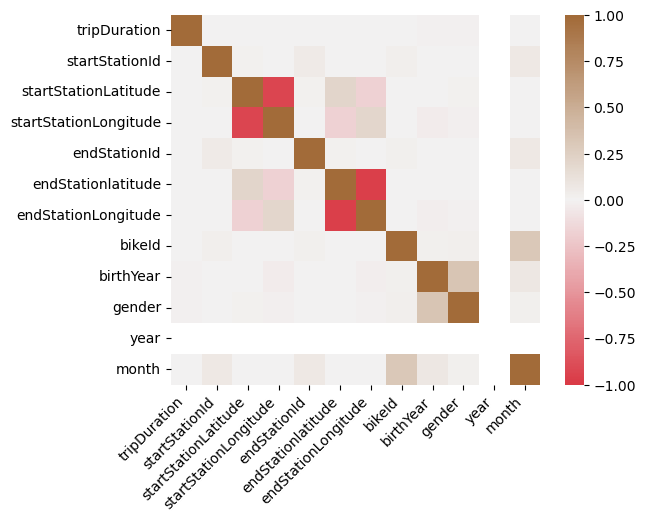

In [34]:
corr_bike_df1 = bike_data.corr()
ax = sns.heatmap(
    corr_bike_df1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 400, n=500),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

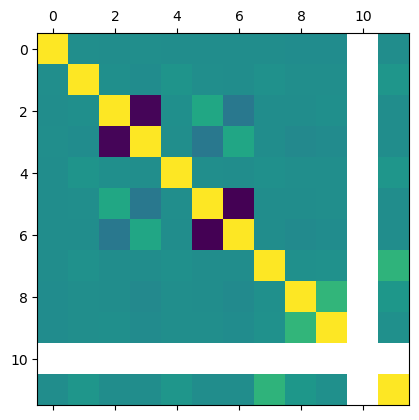

In [35]:
plt.matshow(bike_data.corr());

#### plot the graph for number of trips by customers and subscribers

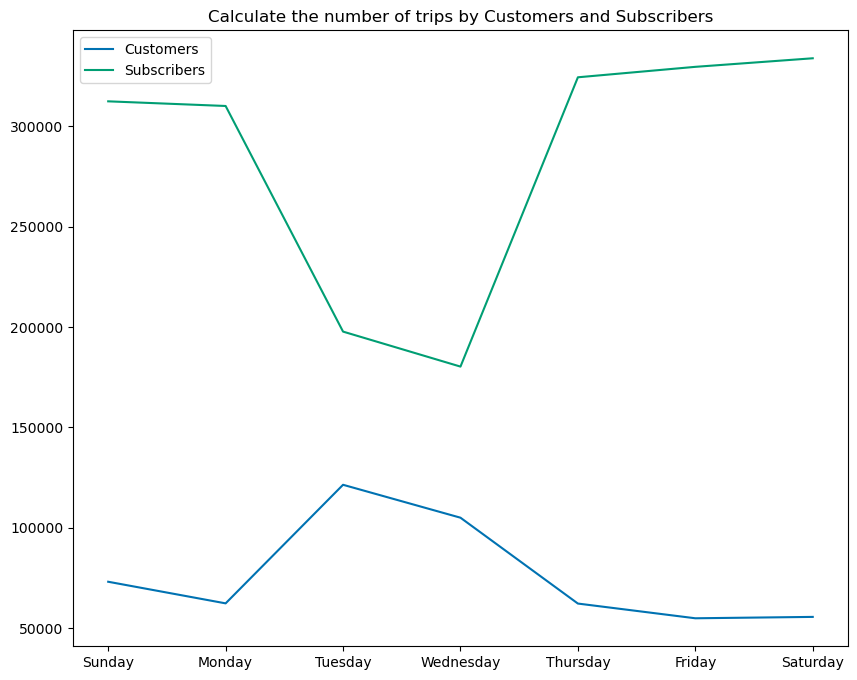

In [36]:
plt.figure(figsize = (10,8))
plt.plot(count_customer_users.index, count_customer_users.values)
plt.plot(count_subscriber_users.index, count_subscriber_users.values)
plt.title('Calculate the number of trips by Customers and Subscribers')
plt.legend(['Customers', 'Subscribers'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_users.index, labels)
plt.show()

In [37]:
# convert the tripDuration data type

bike_data['tripDuration'] = pd.to_timedelta(bike_data['tripDuration'] * 10**9)

In [38]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 19 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   tripDuration           timedelta64[ns]
 1   startTime              datetime64[ns] 
 2   stopTime               datetime64[ns] 
 3   startStationId         int64          
 4   startStationName       object         
 5   startStationLatitude   float64        
 6   startStationLongitude  float64        
 7   endStationId           int64          
 8   endStationName         object         
 9   endStationlatitude     float64        
 10  endStationLongitude    float64        
 11  bikeId                 int64          
 12  userType               category       
 13  birthYear              int64          
 14  gender                 int64          
 15  startDate              datetime64[ns] 
 16  dayName                category       
 17  year                   int64          
 18  mont

In [39]:
# calculate the average tripDuration for all users in a week

user_avg_trip = bike_data.groupby('dayName')['tripDuration'].mean(numeric_only=False)
user_avg_trip

dayName
Friday      0 days 00:35:50.365365160
Monday      0 days 00:30:01.949561644
Saturday    0 days 00:57:10.738137622
Sunday      0 days 00:46:05.170921023
Thursday    0 days 00:34:36.765799391
Tuesday     0 days 00:29:02.036331527
Wednesday   0 days 00:27:22.068513587
Name: tripDuration, dtype: timedelta64[ns]

In [40]:
# calculate the average tripDuration for customers in a week

user_avg_customer = bike_data[bike_data['userType'] == 'Customer'].groupby('dayName')['tripDuration'].mean(numeric_only=False)
user_avg_customer

dayName
Friday      0 days 01:50:22.756012428
Monday      0 days 01:37:58.269365999
Saturday    0 days 02:00:13.578262230
Sunday      0 days 01:36:44.871128766
Thursday    0 days 02:07:06.447008313
Tuesday     0 days 01:54:17.414346914
Wednesday   0 days 01:29:09.691458715
Name: tripDuration, dtype: timedelta64[ns]

In [41]:
# calculate the average tripDuration for Subscriber in a week

user_avg_subscriber = bike_data[bike_data['userType'] == 'Subscriber'].groupby('dayName')['tripDuration'].mean(numeric_only=False)
user_avg_subscriber

dayName
Friday      0 days 00:18:24.615093856
Monday      0 days 00:16:23.249761388
Saturday    0 days 00:18:28.361847629
Sunday      0 days 00:16:35.064577508
Thursday    0 days 00:16:52.944612605
Tuesday     0 days 00:14:50.771706023
Wednesday   0 days 00:17:05.328740128
Name: tripDuration, dtype: timedelta64[ns]

#### plot the average ride_length for different users during the week

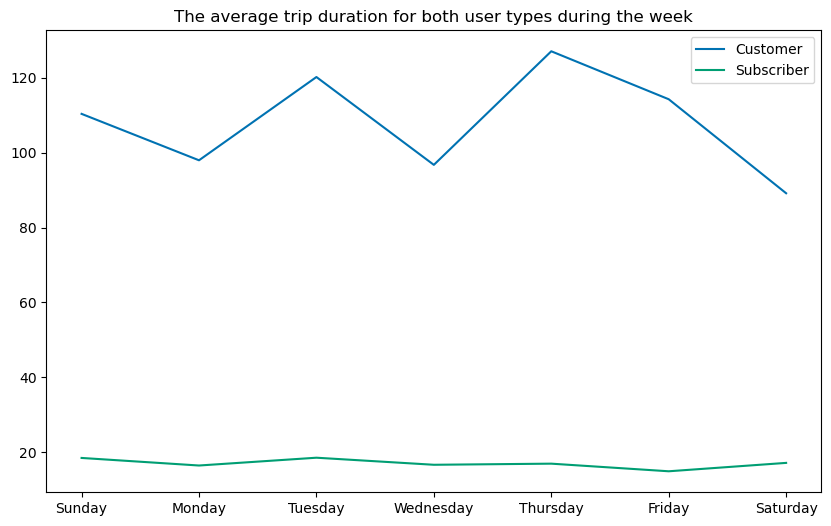

In [42]:
plt.figure(figsize = (10,6))
plt.plot(user_avg_customer/pd.Timedelta(minutes=1))
plt.plot(user_avg_subscriber/pd.Timedelta(minutes=1))
plt.title('The average trip duration for both user types during the week')
plt.legend(['Customer', 'Subscriber'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_customer.index, labels)
plt.show();

#### the number of users in each user type over the past 12 months

In [43]:

user_types = bike_data['userType'].value_counts()
user_types


Subscriber    1988494
Customer       534277
Name: userType, dtype: int64

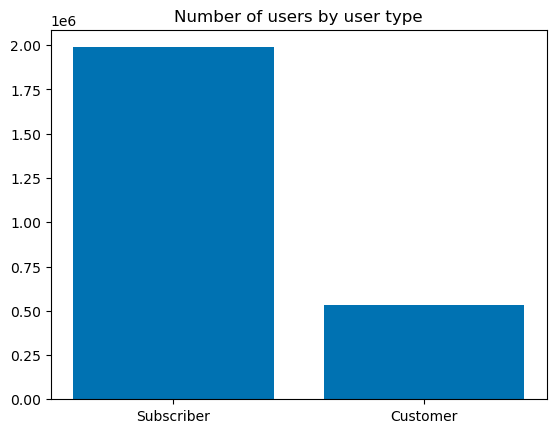

In [44]:
# the number of users in each type over the past 12 months

plt.title('Number of users by user type')
plt.bar(user_types.index, user_types.values)
plt.show()


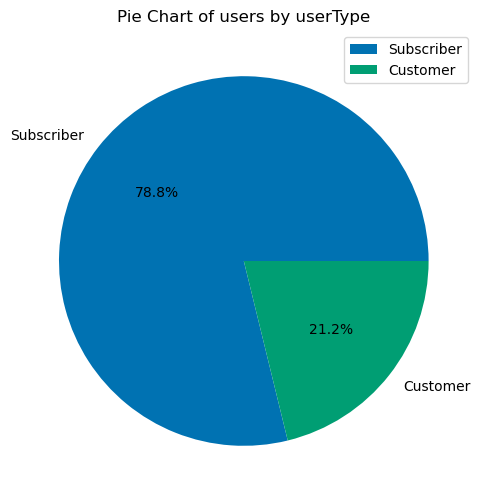

In [45]:
# the pie chart of users in each type 

plt.figure(figsize = (9,6))
plt.title('Pie Chart of users by userType')
plt.pie(user_types.values, labels= user_types.index, autopct= '%1.1f%%')
plt.legend(user_types.index)
plt.show()

In [46]:
# the number of users into members and casual over year

users_over_year = bike_data.groupby('year')['userType'].value_counts()
users_over_year 

year            
2019  Subscriber    1988494
      Customer       534277
Name: userType, dtype: int64

In [47]:
# the total amount of users in each category per month
users_over_month = bike_data.groupby('month')['userType'].value_counts()
users_over_month

month            
1      Subscriber     65090
       Customer        4782
2      Subscriber     73691
       Customer        6775
3      Subscriber     87846
       Customer       14523
4      Subscriber    131880
       Customer       34814
5      Subscriber    171087
       Customer       51997
6      Subscriber    200384
       Customer       73699
7      Subscriber    234918
       Customer       82110
8      Subscriber    250158
       Customer       87361
9      Subscriber    281024
       Customer       82161
10     Subscriber    248801
       Customer       56703
11     Subscriber    162317
       Customer       28442
12     Subscriber     81298
       Customer       10910
Name: userType, dtype: int64

In [48]:
# the number of users into customers and subscribers over months
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike_data, x='month', y=, ax=ax)

ax.set(title='Count of bikes during different months')


SyntaxError: invalid syntax (3686123862.py, line 2)

In [50]:
bike_data.head(3)

,tripDuration,startTime,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,endStationLongitude,bikeId,userType,birthYear,gender,startDate,dayName,year,month
0,0 days 00:06:11,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,2019-01-01,Tuesday,2019,1
1,0 days 00:04:24,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,2019-01-01,Tuesday,2019,1
2,0 days 00:07:38,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1,2019-01-01,Tuesday,2019,1


In [51]:
import calendar
bike_data['monthName'] = bike_data['month'].apply(lambda x: calendar.month_abbr[x])

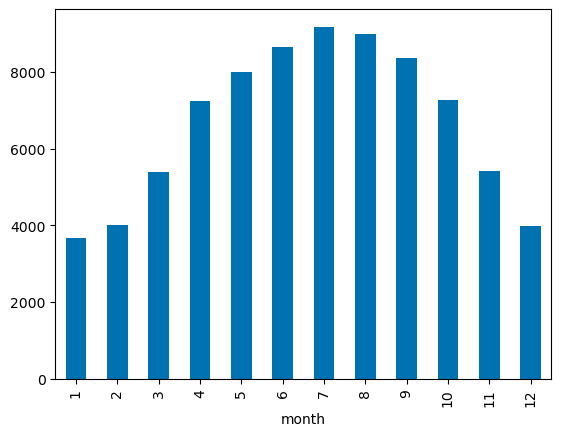

In [52]:
bike_data.groupby('month')['tripDuration'].nunique().plot(kind='bar')
plt.show()


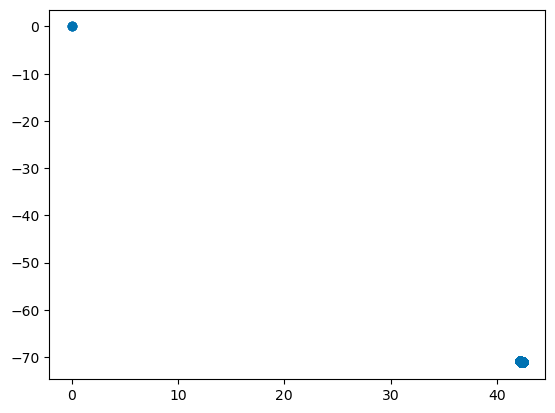

In [53]:
plt.scatter(x=bike_data['startStationLatitude'], y=bike_data['startStationLongitude'])
plt.show()

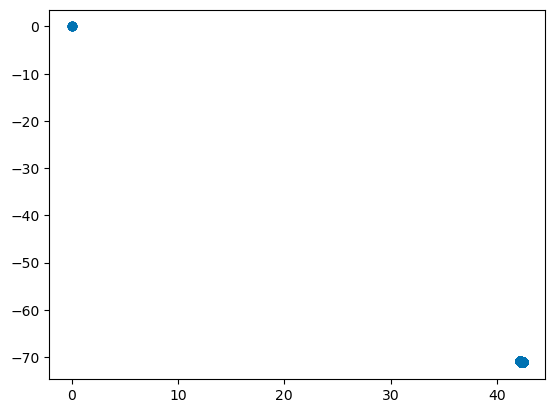

In [54]:
plt.scatter(x=bike_data['endStationlatitude'], y=bike_data['endStationLongitude'])
plt.show()

In [55]:
# Add a new feature for tripDuration in seconds
bike_data['tripDurationSeconds'] = bike_data['tripDuration'].dt.total_seconds()

In [56]:
bike_data.head(3)

,tripDuration,startTime,stopTime,startStationId,startStationName,startStationLatitude,startStationLongitude,endStationId,endStationName,endStationlatitude,...,bikeId,userType,birthYear,gender,startDate,dayName,year,month,monthName,tripDurationSeconds
0,0 days 00:06:11,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,...,3689,Subscriber,1987,1,2019-01-01,Tuesday,2019,1,Jan,371.0
1,0 days 00:04:24,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,...,4142,Subscriber,1990,1,2019-01-01,Tuesday,2019,1,Jan,264.0
2,0 days 00:07:38,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,1628,Subscriber,1977,1,2019-01-01,Tuesday,2019,1,Jan,458.0


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing
import numpy as np

In [2]:
df_1 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201901-bluebikes-tripdata.csv')
df_2 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201902-bluebikes-tripdata.csv')
df_3 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201903-bluebikes-tripdata.csv')
df_4 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201904-bluebikes-tripdata.csv')
df_5 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201905-bluebikes-tripdata.csv')
df_6 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201906-bluebikes-tripdata.csv')
df_7 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201907-bluebikes-tripdata.csv')
df_8 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201908-bluebikes-tripdata.csv')
df_9 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201909-bluebikes-tripdata.csv')
df_10 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201910-bluebikes-tripdata.csv')
df_11 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201911-bluebikes-tripdata.csv')
df_12 = pd.read_csv('C:/Users/SAMUEL/Desktop/MasterClass/ML/mlprojs/2019/201912-bluebikes-tripdata.csv')

In [3]:
bikedata = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12])
bikedata.shape

(2522771, 15)

In [4]:
bikedata.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

### create new columns and transform to int

In [5]:
bikedata['starttime']=pd.to_datetime(bikedata['starttime'])
bikedata['stoptime']=pd.to_datetime(bikedata['stoptime'])
bikedata['duration']=bikedata['starttime']-bikedata['stoptime']
bikedata['weekday']=bikedata['starttime'].dt.day_name()
bikedata['hour']=bikedata['starttime'].dt.hour
bikedata['month']=bikedata['starttime'].dt.month
bikedata['year']=bikedata['starttime'].dt.year
bikedata['age']=bikedata['year']-bikedata['birth year']

le = preprocessing.LabelEncoder()
le.fit(bikedata['usertype'])
bikedata['usertypeNo']=le.transform(bikedata['usertype'])
le.fit(bikedata['weekday'])
bikedata['weekdayNo']=le.transform(bikedata['weekday'])

In [6]:
bikedatareduced=bikedata.drop(['starttime', 'stoptime',
       'start station latitude', 'start station longitude',
       'end station name', 'end station latitude', 'end station longitude',
       'birth year', 'duration','start station name','weekday','usertype',
        'year'], axis=1)
bikedatareduced.columns

Index(['tripduration', 'start station id', 'end station id', 'bikeid',
       'gender', 'hour', 'month', 'age', 'usertypeNo', 'weekdayNo'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

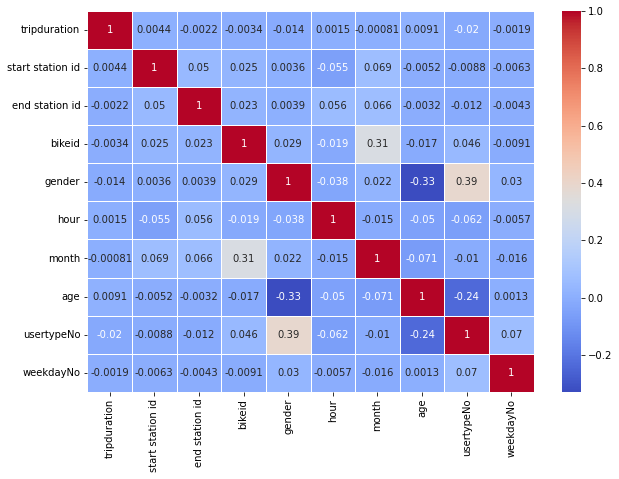

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(bikedatareduced.corr(),cbar=True,linewidths=0.5,cmap="coolwarm",annot=True)
plt.show

### Linear regression

In [8]:
feature_cols = ['tripduration', 'start station id', 'bikeid',
       'gender', 'hour', 'month', 'age', 'usertypeNo', 'weekdayNo']
X = bikedatareduced[feature_cols]
X.shape

(2522771, 9)

In [9]:
y=bikedatareduced['end station id']
y.shape

(2522771,)

### Training and testing 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1892078, 9)
(1892078,)
(630693, 9)
(630693,)


In [13]:
from sklearn.linear_model import LinearRegression 
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [14]:
linreg.intercept_
linreg.coef_
list(zip(feature_cols, linreg.coef_))

[('tripduration', -3.593903325303567e-06),
 ('start station id', 0.04915010950365403),
 ('bikeid', 0.00038336657671893243),
 ('gender', 2.058423628537769),
 ('hour', 1.4603381464721212),
 ('month', 2.69631938698373),
 ('age', 0.059351998998212065),
 ('usertypeNo', -2.8339822761985474),
 ('weekdayNo', -0.12294340576820081)]

In [15]:
y_pred=linreg.predict(X_test)

In [16]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

117.49677302424698
